In [711]:
import pandas as pd
import numpy as np
import seaborn as sns

In [712]:
wtrain = pd.read_feather('input/weather_train.feather')
wtest = pd.read_feather('input/weather_test.feather')

In [713]:
wtotal = pd.concat([wtrain,wtest], ignore_index=True)

In [714]:
wtotal['Year'] = wtotal.timestamp.dt.year
wtotal['Month'] = wtotal.timestamp.dt.month
wtotal['Day'] = wtotal.timestamp.dt.day
wtotal['Hour'] = wtotal.timestamp.dt.hour

In [715]:
table=wtotal.groupby(['site_id','Year','Month','Day','Hour'])[['air_temperature']].mean().unstack(level=1)

## Site x Year Correlation

In [716]:
cm = sns.light_palette("blue", as_cmap=True)
table['air_temperature'].unstack(level=0).corr()[2016].style.background_gradient(cmap=cm)

In [717]:
wtotal.loc[wtotal.Year==2016].groupby(['site_id','Hour'])['air_temperature'].mean().unstack(level=0).style.background_gradient(cmap=cm)

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Hour,,,,,,,,,,,,,,,,
0,23.4811,10.0184,30.2385,16.5529,18.454,9.69613,16.3463,9.33829,23.4811,24.3721,15.7923,9.33829,8.33434,12.0044,14.5389,10.105
1,22.4907,9.70742,29.4612,15.8186,17.559,9.51648,15.3298,8.6,22.4907,23.0641,14.7257,8.6,8.18984,11.3464,13.4801,8.78901
2,21.8055,9.44575,28.3737,15.2396,16.4978,9.36712,14.6019,7.70663,21.8055,22.0063,13.5546,7.70663,8.06493,10.568,12.7765,8.11099
3,21.2776,9.19098,27.1667,14.723,15.5377,9.23836,13.9743,7.2078,21.2776,21.1311,12.0824,7.2078,7.97069,10.0413,12.1202,7.38457
4,20.8801,9.01721,26.021,14.3642,14.8527,9.11233,13.4423,6.70392,20.8801,20.3515,10.9701,6.70392,7.93205,9.4265,11.6123,7.34493
5,20.4087,9.00519,24.9268,13.9244,14.4213,9.09041,13.038,6.26435,20.4087,19.6355,10.3192,6.26435,7.94712,8.97186,11.0359,7.0115
6,20.0831,9.26393,23.9536,13.6734,14.0568,9.2137,12.5519,5.7281,20.0831,19.121,9.8,5.7281,8.23874,8.49317,10.6293,6.66667
7,19.7303,9.80464,23.2011,13.3285,13.7262,9.5863,12.2482,5.40952,19.7303,18.688,9.32637,5.40952,8.66822,8.15191,10.2789,6.43323
8,19.4679,10.5458,22.426,12.9948,13.4776,10.0795,11.9288,4.98167,19.4679,18.3079,8.92005,4.98167,9.22555,7.72924,9.96137,6.08488


In [718]:
air_2016 = wtotal.loc[wtotal.Year==2016].groupby(['site_id','Hour'])['air_temperature'].mean().unstack(level=0)
air_2017 = wtotal.loc[wtotal.Year==2017].groupby(['site_id','Hour'])['air_temperature'].mean().unstack(level=0)
air_2018 = wtotal.loc[wtotal.Year==2018].groupby(['site_id','Hour'])['air_temperature'].mean().unstack(level=0)
dew_2016 = wtotal.loc[wtotal.Year==2016].groupby(['site_id','Hour'])['dew_temperature'].mean().unstack(level=0)
dew_2017 = wtotal.loc[wtotal.Year==2017].groupby(['site_id','Hour'])['dew_temperature'].mean().unstack(level=0)
dew_2018 = wtotal.loc[wtotal.Year==2018].groupby(['site_id','Hour'])['dew_temperature'].mean().unstack(level=0)

In [719]:
import seaborn as sns
import matplotlib.pyplot as plt
def airtemp_plot(df):
    df = df.rank()
    df = df.sort_values(by=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],axis=1).T
    ax = sns.heatmap(df)
    plt.show()
    return None

## Before Alignment

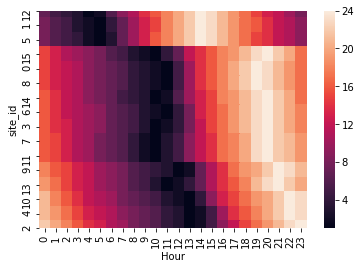

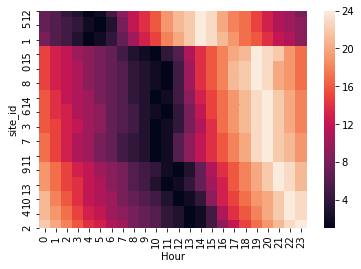

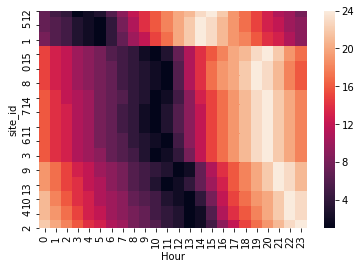

In [721]:
airtemp_plot(air_2016)
airtemp_plot(air_2017)
airtemp_plot(air_2018)

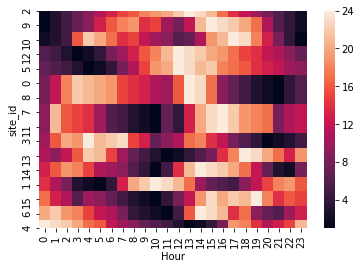

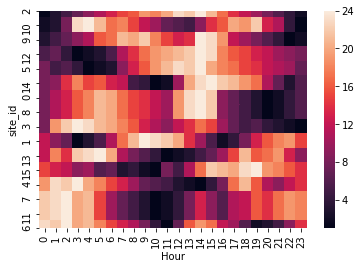

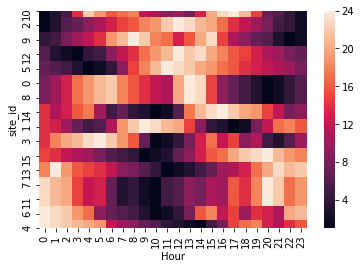

In [722]:
airtemp_plot(dew_2016)
airtemp_plot(dew_2017)
airtemp_plot(dew_2018)

In [723]:
def airtemp_timealign(df,df2,year):
    timediff = df.copy()
    timediff = timediff.rank()
    timediff = timediff.sort_values(by=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],axis=1).T
    site_idx = timediff.index
    offset =  np.where(timediff==24)[1]-14
    for i in df2.site_id.unique():
        df2.loc[(df2.site_id==site_idx[i])&(df2.Year==year),'Hour'] = (df2.loc[(df2.site_id==site_idx[i])&(df2.Year==year),'Hour'] - offset[i])%24
    return df2
        

In [724]:
new = airtemp_timealign(air_2016,wtotal,2016)
new = airtemp_timealign(air_2017,wtotal,2017)
new = airtemp_timealign(air_2018,wtotal,2018)

## After Alignment

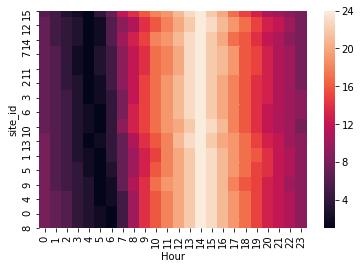

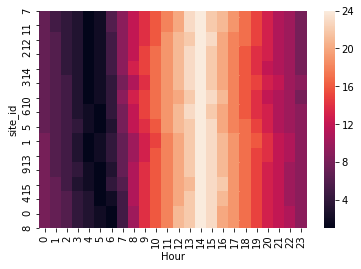

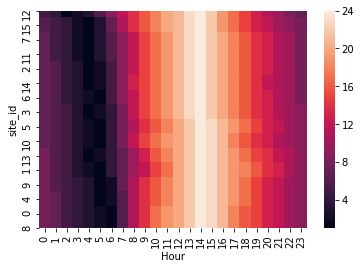

In [726]:
airtemp_plot(new.loc[new.Year==2016].groupby(['site_id','Hour'])['air_temperature'].mean().unstack(level=0))
airtemp_plot(new.loc[new.Year==2017].groupby(['site_id','Hour'])['air_temperature'].mean().unstack(level=0))
airtemp_plot(new.loc[new.Year==2018].groupby(['site_id','Hour'])['air_temperature'].mean().unstack(level=0))

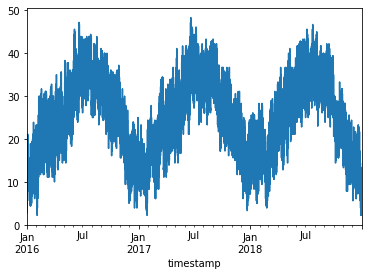

In [727]:
new.loc[new.site_id==2].set_index('timestamp').resample('H').mean().air_temperature.plot()